In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Debug load data axes

Axes options
    
    S: n samples
    ZYX: Z/Y/X direction 
    T: time
    C: channels (MUST be supplied I think, even if 1)

In [1]:
# debuging 'axes is not a file in the archive'
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


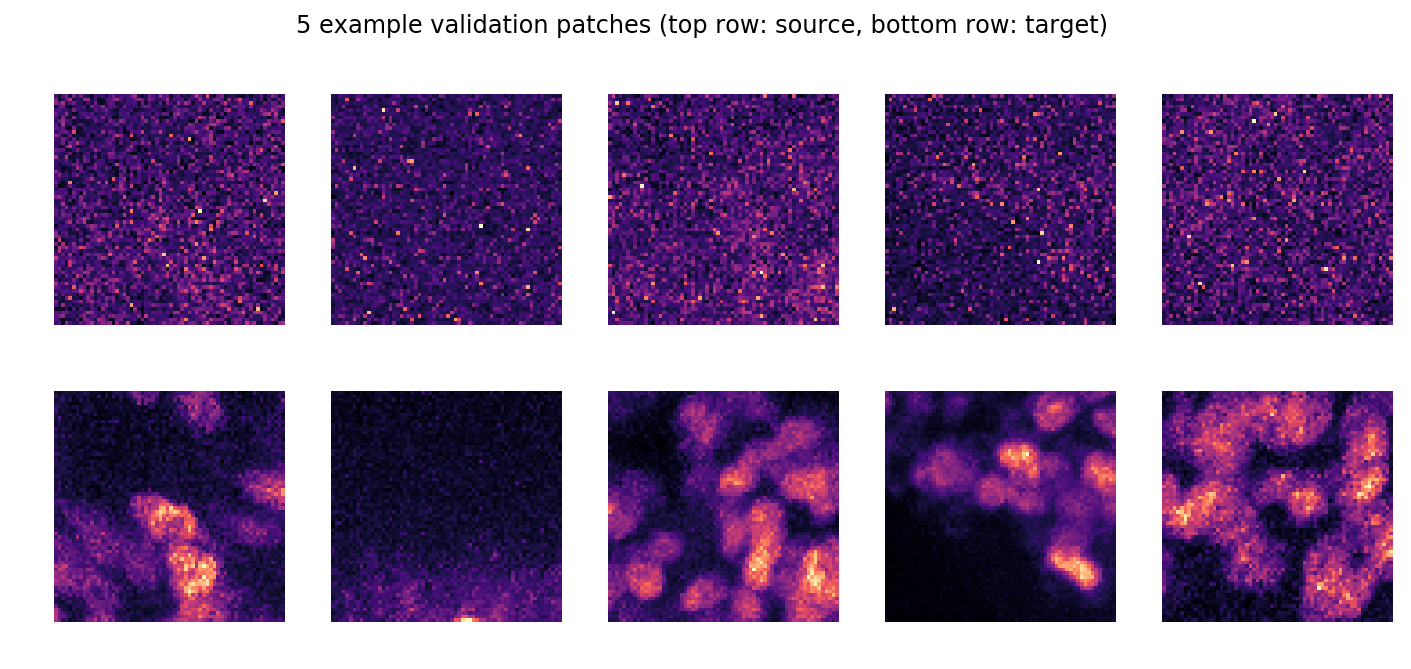

In [4]:
(X,Y), (X_val,Y_val), axes = load_training_data(
    'data/Denoising_Planaria/train_data/data_label.npz', validation_split=0.2, 
    axes='SCZYX', verbose=True)

plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [ ]:
d = 'data/Denoising_Planaria/train_data/data_label.npz'
import numpy as np
dat = np.load(d)

In [3]:
for k, v in dat.items():
    print(k)
    print(v.shape)
    print(v.ndim)
    print(len)

X
(17900, 1, 16, 64, 64)
5
Y
(17900, 1, 16, 64, 64)
5


# planaria-1

In [ ]:
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' '2019-04-01-planaria_model'

# planaria-2
Run >= 200 epochs, then run 2nd 100 epochs from first model 

Mostly to see if it overwrites the tensorboard history and/or starts off with the performance it left off. There's a backup of this model.

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


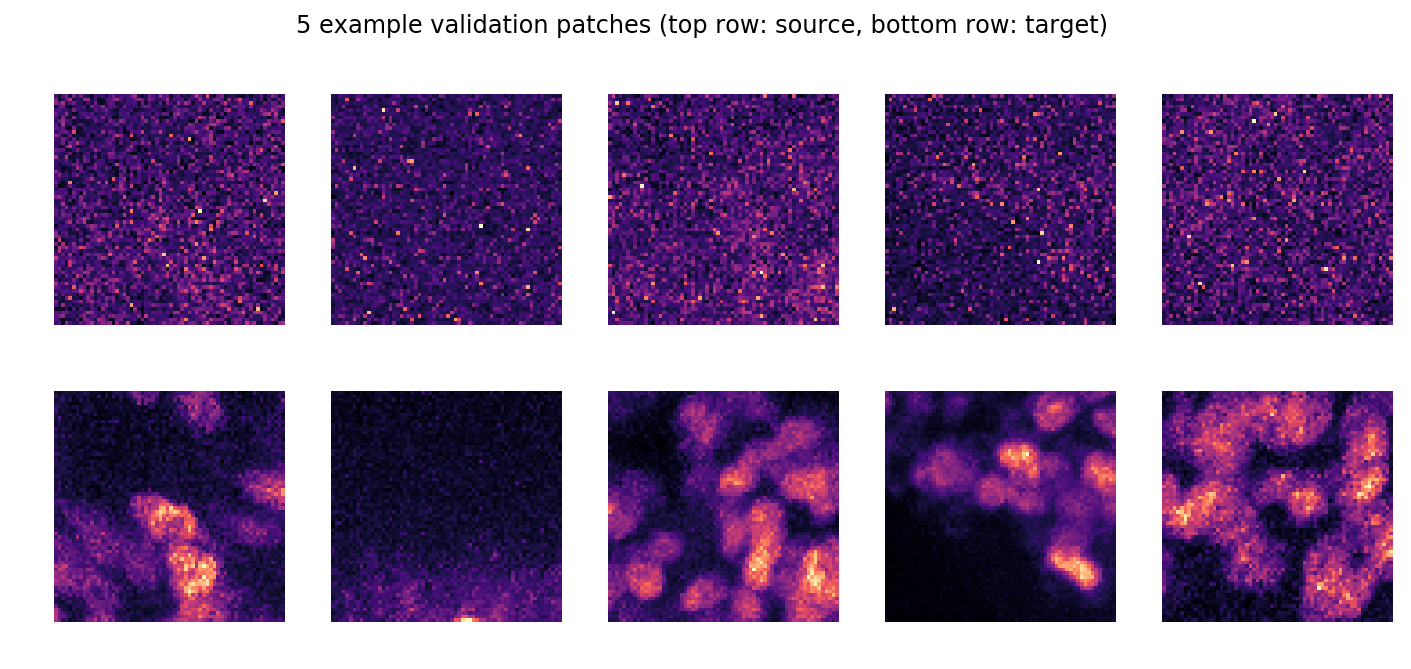

{'n_dim': 3, 'axes': 'ZYXC', 'n_channel_in': 1, 'n_channel_out': 1, 'probabilistic': True, 'unet_residual': True, 'unet_n_depth': 2, 'unet_kern_size': 3, 'unet_n_first': 32, 'unet_last_activation': 'linear', 'unet_input_shape': (None, None, None, 1), 'train_loss': 'laplace', 'train_epochs': 200, 'train_steps_per_epoch': 400, 'train_learning_rate': 0.0004, 'train_batch_size': 16, 'train_tensorboard': True, 'train_checkpoint': 'weights_best.h5', 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
400/400 [==============================] - 152s 379ms/step - loss: -

400/400 [==============================] - 145s 362ms/step - loss: -1.6537 - mse: 0.0040 - mae: 0.0403 - val_loss: -1.6489 - val_mse: 0.0043 - val_mae: 0.0407
Epoch 86/200
400/400 [==============================] - 145s 362ms/step - loss: -1.6554 - mse: 0.0041 - mae: 0.0402 - val_loss: -1.6478 - val_mse: 0.0043 - val_mae: 0.0407
Epoch 87/200
400/400 [==============================] - 145s 362ms/step - loss: -1.6641 - mse: 0.0039 - mae: 0.0398 - val_loss: -1.6371 - val_mse: 0.0045 - val_mae: 0.0411
Epoch 88/200
400/400 [==============================] - 145s 362ms/step - loss: -1.6655 - mse: 0.0039 - mae: 0.0398 - val_loss: -1.6430 - val_mse: 0.0043 - val_mae: 0.0408
Epoch 89/200
400/400 [==============================] - 145s 362ms/step - loss: -1.6613 - mse: 0.0040 - mae: 0.0401 - val_loss: -1.6290 - val_mse: 0.0042 - val_mae: 0.0413
Epoch 90/200
400/400 [==============================] - 145s 362ms/step - loss: -1.6689 - mse: 0.0040 - mae: 0.0396 - val_loss: -1.6417 - val_mse: 0.0042

400/400 [==============================] - 145s 362ms/step - loss: -1.7098 - mse: 0.0037 - mae: 0.0383 - val_loss: -1.6581 - val_mse: 0.0042 - val_mae: 0.0403
Epoch 177/200
400/400 [==============================] - 145s 362ms/step - loss: -1.7100 - mse: 0.0037 - mae: 0.0383 - val_loss: -1.6584 - val_mse: 0.0042 - val_mae: 0.0403
Epoch 178/200
400/400 [==============================] - 145s 362ms/step - loss: -1.7019 - mse: 0.0038 - mae: 0.0386 - val_loss: -1.6583 - val_mse: 0.0042 - val_mae: 0.0403
Epoch 179/200
400/400 [==============================] - 145s 362ms/step - loss: -1.7127 - mse: 0.0037 - mae: 0.0382 - val_loss: -1.6583 - val_mse: 0.0042 - val_mae: 0.0403
Epoch 180/200
400/400 [==============================] - 145s 362ms/step - loss: -1.7074 - mse: 0.0038 - mae: 0.0385 - val_loss: -1.6583 - val_mse: 0.0042 - val_mae: 0.0403
Epoch 181/200
400/400 [==============================] - 145s 362ms/step - loss: -1.7089 - mse: 0.0036 - mae: 0.0383 - val_loss: -1.6585 - val_mse: 0

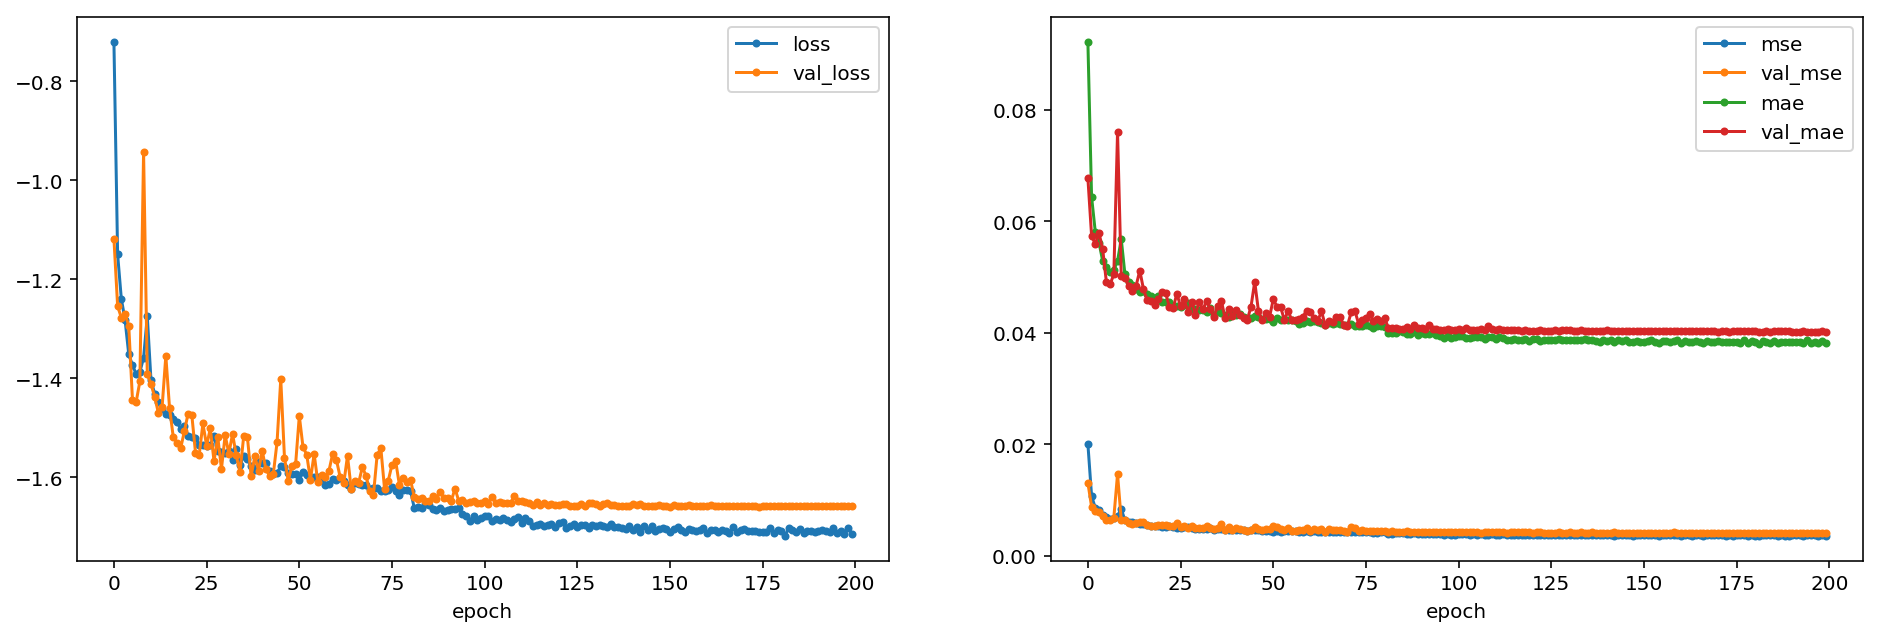

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmps2vlb0ni/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/home/nikoli/cbsdeep/runs/denoising2D/models/2019-04-02-planaria_model/TF_SavedModel.zip
CPU times: user 4h 33min 5s, sys: 1h 53min 56s, total: 6h 27min 1s
Wall time: 8h 3min 54s


In [2]:
%%time
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' \
'2019-04-02-planaria_model' '--epochs' '200'

# planaria-1.2

number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


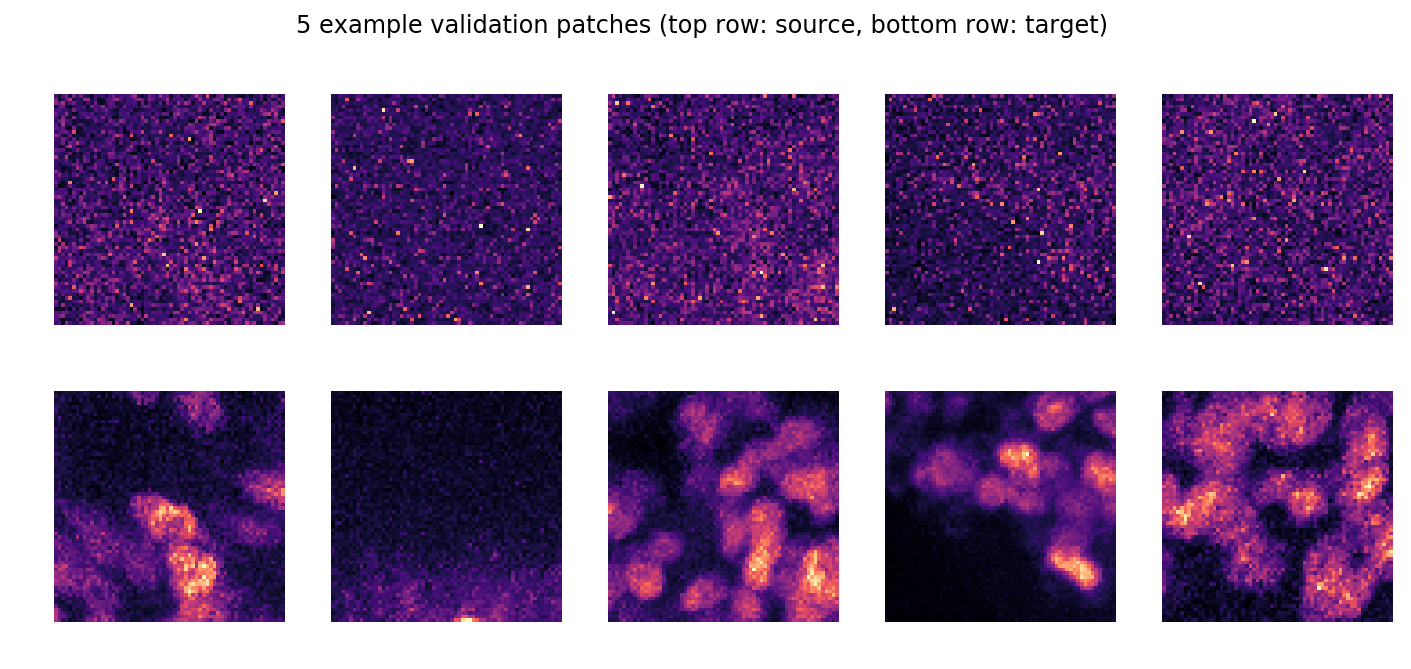

{'n_dim': 3, 'axes': 'ZYXC', 'n_channel_in': 1, 'n_channel_out': 1, 'probabilistic': True, 'unet_residual': True, 'unet_n_depth': 2, 'unet_kern_size': 3, 'unet_n_first': 32, 'unet_last_activation': 'linear', 'unet_input_shape': (None, None, None, 1), 'train_loss': 'laplace', 'train_epochs': 100, 'train_steps_per_epoch': 400, 'train_learning_rate': 0.0004, 'train_batch_size': 16, 'train_tensorboard': True, 'train_checkpoint': 'weights_best.h5', 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}


/home/nikoli/.miniconda3/envs/cbsdeep/lib/python3.6/site-packages/csbdeep/models/care_standard.py:139: UserWarning: output path for model already exists, files may be overwritten: /home/nikoli/cbsdeep/runs/denoising2D/models/2019-04-01-planaria_model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


Epoch 1/100
400/400 [==============================] - 142s 356ms/step - loss: -0.6792 - mse: 0.0215 - mae: 0.0947 - val_loss: -1.1234 - val_mse: 0.0140 - val_mae: 0.0684
Epoch 2/100
400/400 [==============================] - 141s 353ms/step - loss: -1.1871 - mse: 0.0098 - mae: 0.0616 - val_loss: -1.2513 - val_mse: 0.0083 - val_mae: 0.0564
Epoch 3/100
400/400 [==============================] - 141s 353ms/step - loss: -1.2852 - mse: 0.0081 - mae: 0.0560 - val_loss: -1.2013 - val_mse: 0.0091 - val_mae: 0.0598
Epoch 4/100
400/400 [==============================] - 141s 353ms/step - loss: -1.3319 - mse: 0.0074 - mae: 0.0537 - val_loss: -1.3952 - val_mse: 0.0069 - val_mae: 0.0511
Epoch 5/100
400/400 [==============================] - 141s 353ms/step - loss: -1.3785 - mse: 0.0068 - mae: 0.0515 - val_loss: -1.4102 - val_mse: 0.0065 - val_mae: 0.0509
Epoch 6/100
400/400 [==============================] - 141s 353ms/step - loss: -1.4145 - mse: 0.0064 - mae: 0.0498 - val_loss: -1.4070 - val_mse:

Epoch 49/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6136 - mse: 0.0044 - mae: 0.0418 - val_loss: -1.6259 - val_mse: 0.0044 - val_mae: 0.0415
Epoch 50/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6201 - mse: 0.0043 - mae: 0.0415 - val_loss: -1.6099 - val_mse: 0.0044 - val_mae: 0.0421
Epoch 51/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6011 - mse: 0.0044 - mae: 0.0422 - val_loss: -1.5496 - val_mse: 0.0048 - val_mae: 0.0438
Epoch 52/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6166 - mse: 0.0043 - mae: 0.0416 - val_loss: -1.6208 - val_mse: 0.0043 - val_mae: 0.0414
Epoch 53/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6128 - mse: 0.0043 - mae: 0.0416 - val_loss: -1.6107 - val_mse: 0.0053 - val_mae: 0.0421
Epoch 54/100
400/400 [==============================] - 141s 352ms/step - loss: -1.6041 - mse: 0.0044 - mae: 0.0420 - val_loss: -1.6084 - va

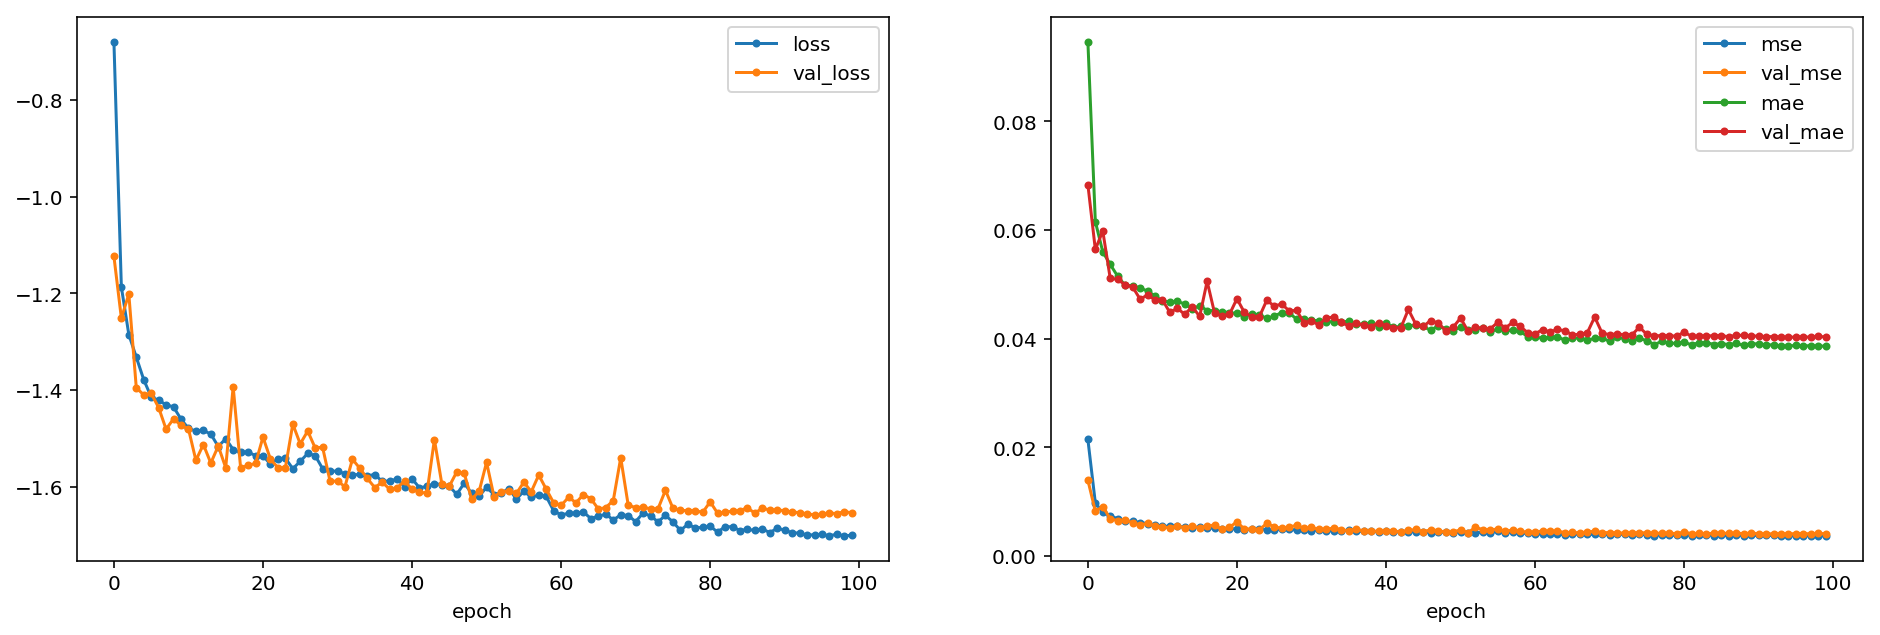

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpuyvvnn2e/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/home/nikoli/cbsdeep/runs/denoising2D/models/2019-04-01-planaria_model/TF_SavedModel.zip
CPU times: user 2h 13min 28s, sys: 55min 29s, total: 3h 8min 58s
Wall time: 3h 55min 31s


In [3]:
%%time
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' \
'2019-04-01-planaria_model'

# planaria-3

In [1]:
%%time
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' \
'2019-04-03-planaria-3' '--epochs' '200'

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


<Figure size 1200x500 with 10 Axes>

{'n_dim': 3, 'axes': 'ZYXC', 'n_channel_in': 1, 'n_channel_out': 1, 'probabilistic': True, 'unet_residual': True, 'unet_n_depth': 2, 'unet_kern_size': 3, 'unet_n_first': 32, 'unet_last_activation': 'linear', 'unet_input_shape': (None, None, None, 1), 'train_loss': 'laplace', 'train_epochs': 200, 'train_steps_per_epoch': 400, 'train_learning_rate': 0.0004, 'train_batch_size': 16, 'train_tensorboard': True, 'train_checkpoint': 'weights_best.h5', 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
400/400 [==============================] - 149s 373ms/step - loss: -

Epoch 86/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6411 - mse: 0.0041 - mae: 0.0407 - val_loss: -1.5521 - val_mse: 0.0045 - val_mae: 0.0440
Epoch 87/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6333 - mse: 0.0042 - mae: 0.0410 - val_loss: -1.6236 - val_mse: 0.0044 - val_mae: 0.0415
Epoch 88/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6467 - mse: 0.0041 - mae: 0.0405 - val_loss: -1.6217 - val_mse: 0.0043 - val_mae: 0.0415
Epoch 89/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6501 - mse: 0.0040 - mae: 0.0403 - val_loss: -1.6333 - val_mse: 0.0043 - val_mae: 0.0412
Epoch 90/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6353 - mse: 0.0042 - mae: 0.0410 - val_loss: -1.6327 - val_mse: 0.0044 - val_mae: 0.0413
Epoch 91/200
400/400 [==============================] - 146s 364ms/step - loss: -1.6489 - mse: 0.0041 - mae: 0.0404 - val_loss: -1.6199 - va

400/400 [==============================] - 146s 364ms/step - loss: -1.7062 - mse: 0.0037 - mae: 0.0384 - val_loss: -1.6409 - val_mse: 0.0042 - val_mae: 0.0409
Epoch 133/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7089 - mse: 0.0037 - mae: 0.0384 - val_loss: -1.6436 - val_mse: 0.0041 - val_mae: 0.0408
Epoch 134/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7024 - mse: 0.0037 - mae: 0.0385 - val_loss: -1.6481 - val_mse: 0.0041 - val_mae: 0.0406
Epoch 135/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7075 - mse: 0.0037 - mae: 0.0384 - val_loss: -1.6517 - val_mse: 0.0042 - val_mae: 0.0405

Epoch 00135: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 136/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7072 - mse: 0.0037 - mae: 0.0384 - val_loss: -1.6526 - val_mse: 0.0042 - val_mae: 0.0405
Epoch 137/200
400/400 [==============================] - 146s 364ms/

400/400 [==============================] - 146s 364ms/step - loss: -1.7122 - mse: 0.0037 - mae: 0.0383 - val_loss: -1.6530 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 179/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7174 - mse: 0.0036 - mae: 0.0380 - val_loss: -1.6536 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 180/200
400/400 [==============================] - 146s 365ms/step - loss: -1.7102 - mse: 0.0037 - mae: 0.0384 - val_loss: -1.6527 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 181/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7161 - mse: 0.0036 - mae: 0.0381 - val_loss: -1.6536 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 182/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7200 - mse: 0.0036 - mae: 0.0380 - val_loss: -1.6533 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 183/200
400/400 [==============================] - 146s 364ms/step - loss: -1.7108 - mse: 0.0036 - mae: 0.0383 - val_loss: -1.6531 - val_mse: 0

<Figure size 1600x500 with 2 Axes>

AttributeError: 'Namespace' object has no attribute 'modelname'

CPU times: user 4h 35min 55s, sys: 1h 53min 18s, total: 6h 29min 14s
Wall time: 8h 6min 28s


# planaria-4

number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


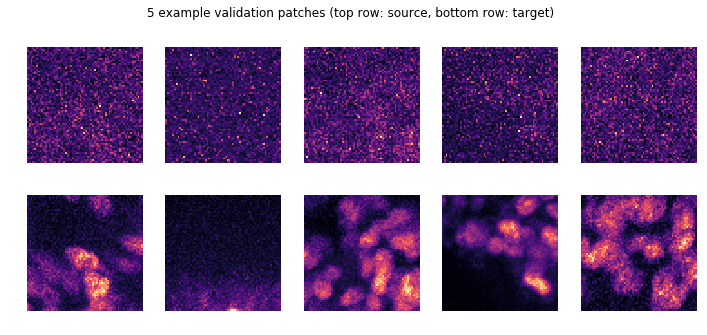

{'n_dim': 3, 'axes': 'ZYXC', 'n_channel_in': 1, 'n_channel_out': 1, 'probabilistic': True, 'unet_residual': True, 'unet_n_depth': 2, 'unet_kern_size': 3, 'unet_n_first': 32, 'unet_last_activation': 'linear', 'unet_input_shape': (None, None, None, 1), 'train_loss': 'laplace', 'train_epochs': 200, 'train_steps_per_epoch': 400, 'train_learning_rate': 0.0004, 'train_batch_size': 16, 'train_tensorboard': True, 'train_checkpoint': 'weights_best.h5', 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}
Epoch 1/200
400/400 [==============================] - 142s 356ms/step - loss: -0.7311 - mse: 0.0204 - mae: 0.0919 - val_loss: -0.8926 - val_mse: 0.0133 - val_mae: 0.0788
Epoch 2/200
400/400 [==============================] - 142s 354ms/step - loss: -1.1837 - mse: 0.0096 - mae: 0.0614 - val_loss: -1.0550 - val_mse: 0.0117 - val_mae: 0.0683
Epoch 3/200
400/400 [==============================] - 142s 355ms/step - loss: -1.2767 - mse: 0.0083 - mae: 0.0564 - val_loss: -1.3219 - val_m

Epoch 46/200
400/400 [==============================] - 141s 353ms/step - loss: -1.5939 - mse: 0.0045 - mae: 0.0425 - val_loss: -1.5983 - val_mse: 0.0047 - val_mae: 0.0425
Epoch 47/200
400/400 [==============================] - 141s 354ms/step - loss: -1.5896 - mse: 0.0045 - mae: 0.0426 - val_loss: -1.5517 - val_mse: 0.0049 - val_mae: 0.0444
Epoch 48/200
400/400 [==============================] - 141s 354ms/step - loss: -1.6000 - mse: 0.0045 - mae: 0.0422 - val_loss: -1.5326 - val_mse: 0.0050 - val_mae: 0.0448

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.00019999999494757503.
Epoch 49/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6226 - mse: 0.0043 - mae: 0.0415 - val_loss: -1.6066 - val_mse: 0.0047 - val_mae: 0.0421
Epoch 50/200
400/400 [==============================] - 141s 352ms/step - loss: -1.6227 - mse: 0.0043 - mae: 0.0415 - val_loss: -1.6053 - val_mse: 0.0047 - val_mae: 0.0422
Epoch 51/200
400/400 [==============================] - 14

Epoch 93/200
400/400 [==============================] - 141s 354ms/step - loss: -1.6727 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6545 - val_mse: 0.0041 - val_mae: 0.0404
Epoch 94/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6763 - mse: 0.0039 - mae: 0.0396 - val_loss: -1.6559 - val_mse: 0.0042 - val_mae: 0.0404
Epoch 95/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6749 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6410 - val_mse: 0.0041 - val_mae: 0.0409
Epoch 96/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6712 - mse: 0.0039 - mae: 0.0397 - val_loss: -1.6320 - val_mse: 0.0042 - val_mae: 0.0411
Epoch 97/200
400/400 [==============================] - 142s 354ms/step - loss: -1.6783 - mse: 0.0039 - mae: 0.0394 - val_loss: -1.6511 - val_mse: 0.0042 - val_mae: 0.0405
Epoch 98/200
400/400 [==============================] - 141s 354ms/step - loss: -1.6763 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6434 - va


Epoch 00139: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 140/200
400/400 [==============================] - 141s 354ms/step - loss: -1.7028 - mse: 0.0037 - mae: 0.0386 - val_loss: -1.6645 - val_mse: 0.0041 - val_mae: 0.0400
Epoch 141/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6962 - mse: 0.0038 - mae: 0.0389 - val_loss: -1.6646 - val_mse: 0.0040 - val_mae: 0.0400
Epoch 142/200
400/400 [==============================] - 141s 353ms/step - loss: -1.6972 - mse: 0.0037 - mae: 0.0388 - val_loss: -1.6620 - val_mse: 0.0041 - val_mae: 0.0401
Epoch 143/200
400/400 [==============================] - 141s 354ms/step - loss: -1.7032 - mse: 0.0038 - mae: 0.0386 - val_loss: -1.6649 - val_mse: 0.0041 - val_mae: 0.0400
Epoch 144/200
400/400 [==============================] - 142s 354ms/step - loss: -1.7013 - mse: 0.0037 - mae: 0.0386 - val_loss: -1.6616 - val_mse: 0.0041 - val_mae: 0.0401
Epoch 145/200
400/400 [==============================]

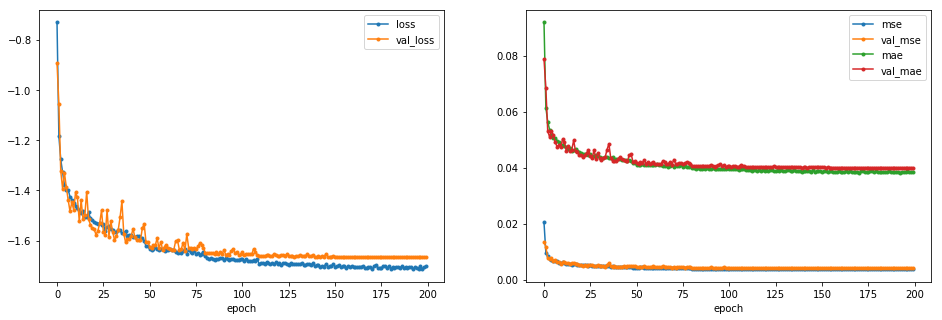

AttributeError: 'Namespace' object has no attribute 'modelname'

CPU times: user 4h 28min 47s, sys: 1h 49min 57s, total: 6h 18min 45s
Wall time: 7h 52min 7s


In [2]:
%%time
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' \
'2019-04-02-planaria-4' '--epochs' '200'